We are provided with the following IVPs of the 1st-order differential equations. We have to solve them within the interval $x \in [0,30]$ using the Heun's, RK4 and Adams methods.

Following are the differential equations:

$(a)$ $y' = ycos(x + y)$, $y(0) = 1$

$(b)$ $y' = sin(xy)cos(x + y)$, $y(0) = 1$

$(c)$ $y' = xy - x^{2}$, $y(0) = 1$

$(d)$ $(logistic equation)$ $y' = y(3 - y)$, $y(0) = 1$

$(e)$ $(Riccati equation)$ $y' = y^{2} - x^{2}$, $y(0) = \frac{1}{2}$

$(f)$ $y' = \frac{1}{3x - 2y + 1}$, $y(0) = 0$



First, we have to define all the differential equations in python;

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Defining all the given equations
def ode1(x, y):
    return y * np.cos(x + y)

def ode2(x, y):
    return np.sin(x * y) * np.cos(x + y)

def ode3(x,y):
    return x * y - x ** 2

def ode4(x,y):
    return y * (3 - y)

def ode5(x,y):
    return y ** 2 - x ** 2

def ode6(x,y):
    return 1 / (3 * x - 2 * y + 1)

$1)$ Solution using RK4 method:

In [25]:
def rk4_step(func, x, y, h): #Defining RK4
    k1 = h * func(x, y)
    k2 = h * func(x + h / 2, y + k1 / 2)
    k3 = h * func(x + h / 2, y + k2 / 2)
    k4 = h * func(x + h, y + k3)
    return y + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

x0 = 0
x_last = 30
h = 0.25

#ODE1
x = np.arange(x0, x_last + h, h)
y01 = 1
y1 = [y01]
for i in range(len(x)):
    y = rk4_step(ode1, x[i], y1[i], h)
    y1.append(y)
y1 = y1[0:-1]
print(f"Solution at x = {x}: y1 = {y1}")
print("")

#ODE2
y02 = 1
y2 = [y02]
for i in range(len(x)):
    y = rk4_step(ode2, x[i], y2[i], h)
    y2.append(y)
y2 = y2[0:-1]
print(f"Solution at x = {x}: y2 = {y2}")
print("")

#ODE3
x = np.arange(x0, 30 + h, h)
y03 = 1
y3 = [y03]
for i in range(len(x)):
    y = rk4_step(ode3, x[i], y3[i], h)
    y3.append(y)
y3 = y3[0:-1]
# print(f"Solution at x = {x}: y3 = {y3}")
# print("")

#ODE4
x = np.arange(x0, 30 + h, h)
y04 = 1
y4 = [y04]
for i in range(len(x)):
    y = rk4_step(ode1, x[i], y4[i], h)
    y4.append(y)
y4 = y4[0:-1]
# print(f"Solution at x = {x}: y4 = {y4}")
# print("")

#ODE5
x = np.arange(x0, 30 + h, h)
y05 = 0.5
y5 = [y05]
for i in range(len(x)):
    y = rk4_step(ode1, x[i], y5[i], h)
    y5.append(y)
y5 = y5[0:-1]
# print(f"Solution at x = {x}: y5 = {y5}")
# print("")

#ODE6
x = np.arange(x0, 30 + h, h)
y06 = 0
y6 = [y06]
for i in range(len(x)):
    y = rk4_step(ode1, x[i], y6[i], h)
    y6.append(y)
y6 = y6[0:-1]
# print(f"Solution at x = {x}: y6 = {y6}")
# print("")

Solution at x = [ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75
 30.  ]: y1 = [1, 1.099127353639323, 1.1210442998474242, 1.077803571897224, 0.99132017690638, 0.8810345610819809, 0.7611256467323123, 0.6413517437211367, 0.5283386010556932, 0.42647061318803514, 0.3383698632247708, 0.265145492704121, 0.2066021824736885, 

$2)$ Using Heun's method:

In [26]:
def heun_method(f, x0, y0, h, x_last):
    x = [x0]
    y = [y0]
    
    while x0 < x_last:
        k1 = f(x0, y0)
        y_predictor = y0 + h * k1
        k2 = f(x0 + h, y_predictor)
        y0 = y0 + h * 0.5 * (k1 + k2)
        x0 += h
        x.append(x0)
        y.append(y0)
    
    return np.array(x), np.array(y)

x0 = 0
x_last = 30
h = 0.25

#ODE1
y01 = 1
x1_heun, y1_heun = heun_method(ode1,x0,y01,h,x_last)
print(f"Heuns: x = {x1_heun} and y1 = {y1_heun}")
print("")

#ODE2
y02 = 1
x2_heun, y2_heun = heun_method(ode2,x0,y02,h,x_last)
print(f"Heuns: x = {x2_heun} and y2 = {y2_heun}")
print("")

#ODE3
y03 = 1
x3_heun, y3_heun = heun_method(ode3,x0,y03,h,x_last)
#print(f"Heuns: x = {x3_heun} and y3 = {y3_heun}")
#print("")

#ODE4
y04 = 1
x4_heun, y4_heun = heun_method(ode4,x0,y04,h,x_last)
#print(f"Heuns: x = {x4_heun} and y4 = {y4_heun}")
#print("")

#ODE5
#y05 = 0.5
#x5_heun, y5_heun = heun_method(ode5,x0,y05,h,x_last)
# print(f"Heuns: x = {x5_heun} and y5 = {y5_heun}")
# print("")

#ODE6
y06 = 0
x6_heun, y6_heun = heun_method(ode6,x0,y06,h,x_last)
#print(f"Heuns: x = {x6_heun} and y6 = {y6_heun}")
#print("")

Heuns: x = [ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75
 30.  ] and y1 = [1.         1.09373745 1.11232676 1.0685301  0.98325794 0.87487768
 0.75695526 0.63898777 0.52751223 0.42688741 0.3397263  0.26713663
 0.2089383  0.16396291 0.13044191 0.1064109  0.09004298 0.07986654
 0.07487727 0.07458584 0.07904435 0.08887

$3)$ Using Adam's method:

In [27]:
#Defining Adam's method
def Adams(f, x0, y0, h, x_end):
    # Use Heun's method for the first two steps to initialize
    x_values, y_values = heun_method(f, x0, y0, h, x0 + 2 * h)
    x_values = list(x_values)
    y_values = list(y_values)
    
    # Loop until x_last exceeds x_end
    while x_values[-1] + h <= x_end + 1e-10:  # Adjust for rounding errors
        x_prev, y_prev = x_values[-2], y_values[-2]
        x_last, y_last = x_values[-1], y_values[-1]
        f_prev = f(x_prev, y_prev)
        f_last = f(x_last, y_last)
        y_next = y_last + h * (1.5 * f_last - 0.5 * f_prev)
        x_next = x_last + h
        x_values.append(x_next)
        y_values.append(y_next)
    
    return np.array(x_values), np.array(y_values)
    
x0 = 0
x_last = 30
h = 0.25

#ODE1
y01 = 1
x1_adams, y1_adams = Adams(ode1,x0,y01,h,x_last)
print(f"Adams: x = {x1_adams} and y1 = {y1_adams}")
print("")

#ODE2
y02 = 1
x2_adams, y2_adams = Adams(ode2,x0,y02,h,x_last)
print(f"Adams: x = {x2_adams} and y2 = {y2_adams}")
print("")

#ODE3
y03 = 1
x3_adams, y3_adams = Adams(ode3,x0,y03,h,x_last)
# print(f"Adams: x = {x3_adams} and y3 = {y3_adams}")
# print("")

#ODE4
y04 = 1
x4_adams, y4_adams = Adams(ode4,x0,y04,h,x_last)
# print(f"Adams: x = {x4_adams} and y4 = {y4_adams}")
# print("")

#ODE5
y05 = 0.5
x5_adams, y5_adams = Adams(ode5,x0,y05,h,x_last)
# print(f"Adams: x = {x5_adams} and y5 = {y5_adams}")
# print("")

#ODE6
y06 = 0
x6_adams, y6_adams = Adams(ode6,x0,y06,h,x_last)
# print(f"Adams: x = {x6_adams} and y6 = {y6_adams}")
# print("")

Adams: x = [ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75
 30.  ] and y1 = [1.         1.09373745 1.11232676 1.06423167 0.97380929 0.86265437
 0.74355848 0.62541514 0.51433865 0.41450893 0.32847873 0.25731631
 0.20075476 0.15747844 0.12554963 0.10286836 0.08753762 0.07807555
 0.07349937 0.0733426  0.07765989 0.08704

Plotting of the solutions of the differential equations $(a)$ and $(b)$:

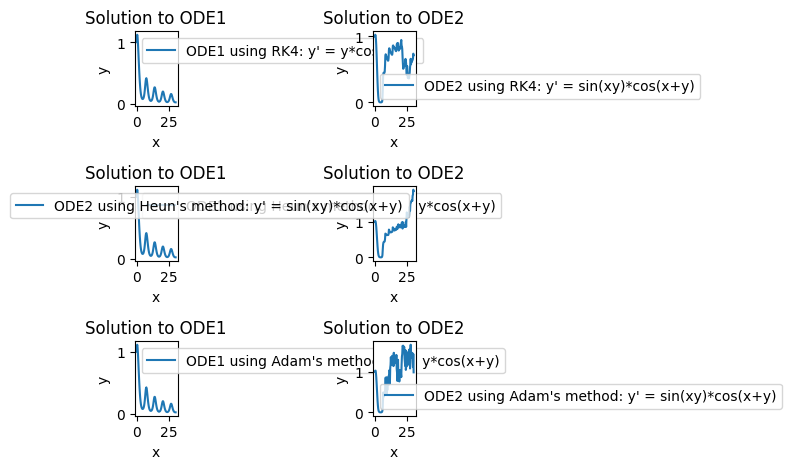

In [28]:
plt.subplot(3, 2, 1)
plt.plot(x, y1, label="ODE1 using RK4: y' = y*cos(x+y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution to ODE1")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(x, y2, label="ODE2 using RK4: y' = sin(xy)*cos(x+y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution to ODE2")
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(x1_heun, y1_heun, label="ODE1 using Heun's method: y' = y*cos(x+y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution to ODE1")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(x2_heun, y2_heun, label="ODE2 using Heun's method: y' = sin(xy)*cos(x+y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution to ODE2")
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(x1_adams, y1_adams, label="ODE1 using Adam's method: y' = y*cos(x+y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution to ODE1")
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(x2_adams, y2_adams, label="ODE2 using Adam's method: y' = sin(xy)*cos(x+y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution to ODE2")
plt.legend()

plt.tight_layout()
plt.show()